In [1]:
# File IO
import os
from pathlib import Path
import shutil

# Torch
import torch
from torch.utils.data import DataLoader
from torch import optim, nn

# Custom
import data
import model
import utils

# Shrink Dataset

Take 50% of training data and turn it into 80% train 20% val

In [2]:
rootPath = Path("dataset/train")
destPath = Path("trunc_dataset")
for root, dirs, files in os.walk(rootPath, topdown=False):
    if len(files) != 0:
        relevant_path = Path(*Path(root).parts[2:])
        end_train_idx = int(len(files) * 0.4)
        end_val_idx = int(len(files) * 0.5)
        (destPath / "train" / relevant_path).mkdir(parents=True, exist_ok=True)
        for i in range(0, end_train_idx):
            origin = str(Path(root) / "{}.jpg".format(i))
            dest = str(destPath / "train" / relevant_path / "{}.jpg".format(i))
            shutil.copyfile(origin, dest)
            
        (destPath / "val" / relevant_path).mkdir(parents=True, exist_ok=True)
        for i in range(end_train_idx, end_val_idx):
            origin = str(Path(root) / "{}.jpg".format(i))
            dest = str(destPath / "val" / relevant_path / "{}.jpg".format(i - end_train_idx))
            shutil.copyfile(origin, dest)

In [3]:
fl_train = data.Lung_Dataset("train", verbose=0, root="trunc_dataset")
fl_val = data.Lung_Dataset("val", verbose=0, root="trunc_dataset")
fl_orig = data.Lung_Dataset("train", verbose=0)

fl_labels = {
0 : "Normal",
1 : "Infected"
}

sl_train = data.Lung_Dataset("train", verbose=2, root="trunc_dataset")
sl_val = data.Lung_Dataset("val", verbose=2, root="trunc_dataset")

sl_labels = {
0 : "COVID",
1 : "Non-COVID"
}

# Grid Search for Learning Rate and Batch Size

LR: 0.01, BS: 16


Epoch 1



Validation loss: 0.2973452809859406
Validation set accuracy:  88.8675623800384 %


Epoch 2



Validation loss: 0.5650650340725075
Validation set accuracy:  79.46257197696737 %


Epoch 3



Validation loss: 0.6688540230194727
Validation set accuracy:  75.23992322456814 %


Epoch 4



Validation loss: 0.47730432044376025
Validation set accuracy:  81.95777351247601 %


Epoch 5



Validation loss: 0.18979049352646776
Validation set accuracy:  95.77735124760076 %


Epoch 6



Validation loss: 0.1639296657857344
Validation set accuracy:  95.39347408829174 %


Epoch 7



Validation loss: 0.6327810784180959
Validation set accuracy:  85.79654510556622 %


Epoch 8



Validation loss: 1.5046265497212792
Validation set accuracy:  76.1996161228407 %


Epoch 9



Validation loss: 0.22006703131465297
Validation set accuracy:  93.85796545105566 %


Epoch 10



Validation loss: 0.25084449613297527
Validation set accuracy:  89.63531669865642 %


Epoch 11



Validation loss: 0.23088165793116344
Validation set accuracy:  92.13051823416507 %
Validation loss: 0.16401428596652817
Validation set accuracy:  95.39347408829174 %


Epoch 1



Validation loss: 0.6242960906028747
Validation set accuracy:  65.37467700258398 %


Epoch 2



Validation loss: 0.6707445526123047
Validation set accuracy:  59.689922480620154 %


Epoch 3



Validation loss: 0.6228710794448853
Validation set accuracy:  65.37467700258398 %


Epoch 4



Validation loss: 0.732254467010498
Validation set accuracy:  49.354005167958654 %


Epoch 5



Validation loss: 0.5148528456687927
Validation set accuracy:  79.84496124031008 %


Epoch 6



Validation loss: 0.6081282424926758
Validation set accuracy:  71.0594315245478 %


Epoch 7



Validation loss: 0.6118232595920563
Validation set accuracy:  67.95865633074935 %


Epoch 8



Validation loss: 0.5701038300991058
Validation set accuracy:  72.86821705426357 %


Epoch 9



Validation loss: 0.569248389005661
Validation set accuracy:  78.03617571059432 %


Epoch 10



Validation loss: 0.6275328850746155
Validation set accuracy:  68.47545219638243 %
Validation loss: 0.518724012374878
Validation set accuracy:  79.84496124031008 %
LR: 0.01, BS: 16, LOSS: 0.34136914917070305
LR: 0.01, BS: 32


Epoch 1



Validation loss: 1.676409577622133
Validation set accuracy:  74.28023032629558 %


Epoch 2



Validation loss: 0.6796872668406543
Validation set accuracy:  75.04798464491363 %


Epoch 3



Validation loss: 2.961390362066381
Validation set accuracy:  74.28023032629558 %


Epoch 4



Validation loss: 0.6728142096715815
Validation set accuracy:  75.62380038387715 %


Epoch 5



Validation loss: 0.14329089626998587
Validation set accuracy:  95.39347408829174 %


Epoch 6



Validation loss: 0.6196303315022412
Validation set accuracy:  78.88675623800384 %


Epoch 7



Validation loss: 0.20735819363857017
Validation set accuracy:  92.7063339731286 %


Epoch 8



Validation loss: 2.1557299494743347
Validation set accuracy:  74.28023032629558 %


Epoch 9



Validation loss: 5.377145612941069
Validation set accuracy:  74.28023032629558 %


Epoch 10



Validation loss: 0.444469795891029
Validation set accuracy:  86.37236084452975 %
Validation loss: 0.13311039212652864
Validation set accuracy:  95.39347408829174 %


Epoch 1



Validation loss: 0.9879391468488253
Validation set accuracy:  35.1421188630491 %


Epoch 2



Validation loss: 0.5956694139884069
Validation set accuracy:  66.66666666666667 %


Epoch 3



Validation loss: 0.6397251532627986
Validation set accuracy:  67.70025839793281 %


Epoch 4



Validation loss: 0.5195553314227325
Validation set accuracy:  76.4857881136951 %


Epoch 5



Validation loss: 0.6212391578234159
Validation set accuracy:  68.21705426356588 %


Epoch 6



Validation loss: 0.5933185334389026
Validation set accuracy:  73.1266149870801 %


Epoch 7



Validation loss: 1.0835697329961336
Validation set accuracy:  39.79328165374677 %


Epoch 8



Validation loss: 0.7488328906205984
Validation set accuracy:  65.63307493540051 %


Epoch 9



Validation loss: 0.5740189368908222
Validation set accuracy:  75.71059431524547 %
Validation loss: 0.6103376287680405
Validation set accuracy:  76.4857881136951 %
LR: 0.01, BS: 32, LOSS: 0.3717240104472846
LR: 0.01, BS: 64


Epoch 1



Validation loss: 2.4430905845430164
Validation set accuracy:  30.518234165067177 %


Epoch 2



Validation loss: 0.43438563413090175
Validation set accuracy:  79.27063339731286 %


Epoch 3



Validation loss: 1.1880430314275954
Validation set accuracy:  73.89635316698656 %


Epoch 4



Validation loss: 3.2909924189249673
Validation set accuracy:  29.942418426103647 %


Epoch 5



Validation loss: 0.8203074733416239
Validation set accuracy:  68.52207293666027 %


Epoch 6



Validation loss: 5.425993654463026
Validation set accuracy:  74.28023032629558 %


Epoch 7



Validation loss: 0.6124409370952182
Validation set accuracy:  75.23992322456814 %
Validation loss: 0.4060424202018314
Validation set accuracy:  79.27063339731286 %


Epoch 1



Validation loss: 0.7891771452767509
Validation set accuracy:  62.27390180878553 %


Epoch 2



Validation loss: 0.6165016463824681
Validation set accuracy:  71.0594315245478 %


Epoch 3



Validation loss: 0.6974671738488334
Validation set accuracy:  55.29715762273902 %


Epoch 4



Validation loss: 0.5777556513037
Validation set accuracy:  70.80103359173127 %


Epoch 5



Validation loss: 0.5331826422895704
Validation set accuracy:  73.38501291989664 %


Epoch 6



Validation loss: 0.6301649212837219
Validation set accuracy:  68.21705426356588 %


Epoch 7



Validation loss: 0.5403365322521755
Validation set accuracy:  69.76744186046511 %


Epoch 8



Validation loss: 0.5735297586236682
Validation set accuracy:  66.9250645994832 %


Epoch 9



Validation loss: 0.6179306762559074
Validation set accuracy:  73.64341085271317 %


Epoch 10



Validation loss: 0.5408843329974583
Validation set accuracy:  72.09302325581395 %
Validation loss: 0.5463388349328723
Validation set accuracy:  73.38501291989664 %
LR: 0.01, BS: 64, LOSS: 0.47619062756735187
LR: 0.001, BS: 16


Epoch 1



Validation loss: 0.1913022224537351
Validation set accuracy:  93.66602687140116 %


Epoch 2



Validation loss: 0.13987614886806995
Validation set accuracy:  93.09021113243762 %


Epoch 3



Validation loss: 0.11844244307951268
Validation set accuracy:  95.58541266794626 %


Epoch 4



Validation loss: 0.16367316961457784
Validation set accuracy:  93.66602687140116 %


Epoch 5



Validation loss: 0.07712451895614239
Validation set accuracy:  96.73704414587333 %


Epoch 6



Validation loss: 0.09096292033085995
Validation set accuracy:  96.92898272552783 %


Epoch 7



Validation loss: 0.09088092595056603
Validation set accuracy:  96.92898272552783 %


Epoch 8



Validation loss: 0.12916674921474292
Validation set accuracy:  95.39347408829174 %


Epoch 9



Validation loss: 0.14345133764965629
Validation set accuracy:  95.00959692898273 %


Epoch 10



Validation loss: 0.08902494017754427
Validation set accuracy:  97.50479846449136 %
Validation loss: 0.0811837651117733
Validation set accuracy:  96.73704414587333 %


Epoch 1



Validation loss: 0.6614029490947724
Validation set accuracy:  65.89147286821705 %


Epoch 2



Validation loss: 0.6910782516002655
Validation set accuracy:  62.53229974160207 %


Epoch 3



Validation loss: 0.5782092702388764
Validation set accuracy:  76.74418604651163 %


Epoch 4



Validation loss: 0.6085238122940063
Validation set accuracy:  66.14987080103359 %


Epoch 5



Validation loss: 0.6082765114307404
Validation set accuracy:  68.9922480620155 %


Epoch 6



Validation loss: 0.556561895608902
Validation set accuracy:  77.2609819121447 %


Epoch 7



Validation loss: 0.550877183675766
Validation set accuracy:  77.2609819121447 %


Epoch 8



Validation loss: 0.5172770321369171
Validation set accuracy:  78.55297157622739 %


Epoch 9



Validation loss: 0.586893265247345
Validation set accuracy:  72.60981912144703 %


Epoch 10



Validation loss: 0.7540146279335022
Validation set accuracy:  62.27390180878553 %


Epoch 11



Validation loss: 0.5211162936687469
Validation set accuracy:  75.71059431524547 %


Epoch 12



Validation loss: 0.6653440737724304
Validation set accuracy:  69.76744186046511 %


Epoch 13



Validation loss: 0.5935687088966369
Validation set accuracy:  72.60981912144703 %
Validation loss: 0.5185377883911133
Validation set accuracy:  78.55297157622739 %
LR: 0.001, BS: 16, LOSS: 0.2998607767514433
LR: 0.001, BS: 32


Epoch 1



Validation loss: 0.6862385921618518
Validation set accuracy:  74.85604606525912 %


Epoch 2



Validation loss: 0.14238769955494823
Validation set accuracy:  95.58541266794626 %


Epoch 3



Validation loss: 0.20058360652011983
Validation set accuracy:  92.89827255278311 %


Epoch 4



Validation loss: 0.12047206522787318
Validation set accuracy:  95.96928982725528 %


Epoch 5



Validation loss: 0.24733948203570702
Validation set accuracy:  94.04990403071017 %


Epoch 6



Validation loss: 0.23705507176846902
Validation set accuracy:  90.7869481765835 %


Epoch 7



Validation loss: 0.1301685718490797
Validation set accuracy:  95.77735124760076 %


Epoch 8



Validation loss: 0.1505022823180565
Validation set accuracy:  95.77735124760076 %


Epoch 9



Validation loss: 0.12892741918125572
Validation set accuracy:  95.96928982725528 %
Validation loss: 0.11859756757450454
Validation set accuracy:  95.96928982725528 %


Epoch 1



Validation loss: 0.7624393288905804
Validation set accuracy:  64.59948320413437 %


Epoch 2



Validation loss: 0.5660880597738119
Validation set accuracy:  68.47545219638243 %


Epoch 3



Validation loss: 0.6052620708942413
Validation set accuracy:  67.44186046511628 %


Epoch 4



Validation loss: 0.5785280030507308
Validation set accuracy:  71.83462532299741 %


Epoch 5



Validation loss: 0.535710144501466
Validation set accuracy:  78.03617571059432 %


Epoch 6



Validation loss: 0.548438542164289
Validation set accuracy:  79.06976744186046 %


Epoch 7



Validation loss: 0.67025920519462
Validation set accuracy:  64.08268733850129 %


Epoch 8



Validation loss: 0.5967792135018569
Validation set accuracy:  71.83462532299741 %


Epoch 9



Validation loss: 0.5697800287833581
Validation set accuracy:  72.09302325581395 %


Epoch 10



Validation loss: 0.5741204619407654
Validation set accuracy:  73.38501291989664 %
Validation loss: 0.5249778582499578
Validation set accuracy:  78.03617571059432 %
LR: 0.001, BS: 32, LOSS: 0.3217877129122312
LR: 0.001, BS: 64


Epoch 1



Validation loss: 0.9768256942431132
Validation set accuracy:  74.28023032629558 %


Epoch 2



Validation loss: 0.3396826121542189
Validation set accuracy:  80.99808061420346 %


Epoch 3



Validation loss: 0.1812273297044966
Validation set accuracy:  94.04990403071017 %


Epoch 4



Validation loss: 0.19792978553515342
Validation set accuracy:  89.2514395393474 %


Epoch 5



Validation loss: 0.09671787462300724
Validation set accuracy:  95.96928982725528 %


Epoch 6



Validation loss: 0.07858263525283998
Validation set accuracy:  96.92898272552783 %


Epoch 7



Validation loss: 0.10746505654727419
Validation set accuracy:  96.16122840690979 %


Epoch 8



Validation loss: 0.10021434393193987
Validation set accuracy:  96.73704414587333 %


Epoch 9



Validation loss: 0.09441154429482089
Validation set accuracy:  96.92898272552783 %


Epoch 10



Validation loss: 0.07477494267125924
Validation set accuracy:  97.31285988483685 %


Epoch 11



Validation loss: 0.08901727634171645
Validation set accuracy:  97.50479846449136 %


Epoch 12



Validation loss: 0.08752408393451737
Validation set accuracy:  96.92898272552783 %


Epoch 13



Validation loss: 0.15178304724395275
Validation set accuracy:  97.12092130518234 %


Epoch 14



Validation loss: 0.11059264388556282
Validation set accuracy:  95.96928982725528 %


Epoch 15



Validation loss: 0.11533136727909248
Validation set accuracy:  95.58541266794626 %
Validation loss: 0.07471323872192039
Validation set accuracy:  97.31285988483685 %


Epoch 1



Validation loss: 0.6989396916968482
Validation set accuracy:  65.37467700258398 %


Epoch 2



Validation loss: 0.682831381048475
Validation set accuracy:  65.37467700258398 %


Epoch 3



Validation loss: 0.5761793809277671
Validation set accuracy:  65.11627906976744 %


Epoch 4



Validation loss: 0.5729673249380929
Validation set accuracy:  66.66666666666667 %


Epoch 5



Validation loss: 0.5590076659406934
Validation set accuracy:  72.3514211886305 %


Epoch 6



Validation loss: 0.5555639224393027
Validation set accuracy:  66.9250645994832 %


Epoch 7



Validation loss: 0.688543609210423
Validation set accuracy:  63.049095607235145 %


Epoch 8



Validation loss: 0.6119258488927569
Validation set accuracy:  74.16020671834626 %


Epoch 9



Validation loss: 0.6517966049058097
Validation set accuracy:  72.60981912144703 %


Epoch 10



Validation loss: 0.6154524002756391
Validation set accuracy:  70.54263565891473 %


Epoch 11



Validation loss: 0.6043529510498047
Validation set accuracy:  71.0594315245478 %
Validation loss: 0.6010692715644836
Validation set accuracy:  66.9250645994832 %
LR: 0.001, BS: 64, LOSS: 0.337891255143202
LR: 0.0001, BS: 16


Epoch 1



Validation loss: 0.22204888792652072
Validation set accuracy:  92.13051823416507 %


Epoch 2



Validation loss: 0.24031532211511425
Validation set accuracy:  87.52399232245682 %


Epoch 3



Validation loss: 0.2507890917812333
Validation set accuracy:  87.3320537428023 %


Epoch 4



Validation loss: 0.18773136287927628
Validation set accuracy:  91.93857965451056 %


Epoch 5



Validation loss: 0.20692910076203672
Validation set accuracy:  90.7869481765835 %


Epoch 6



Validation loss: 0.22371583262627776
Validation set accuracy:  89.82725527831094 %


Epoch 7



Validation loss: 0.2703899167121783
Validation set accuracy:  88.67562380038387 %


Epoch 8



Validation loss: 0.4584788969068816
Validation set accuracy:  83.87715930902111 %


Epoch 9



Validation loss: 0.3126280833261483
Validation set accuracy:  85.98848368522073 %
Validation loss: 0.1869227998523098
Validation set accuracy:  91.93857965451056 %


Epoch 1



Validation loss: 0.5532776141166686
Validation set accuracy:  72.3514211886305 %


Epoch 2



Validation loss: 0.5857865476608276
Validation set accuracy:  72.86821705426357 %


Epoch 3



Validation loss: 0.5928061985969544
Validation set accuracy:  66.66666666666667 %


Epoch 4



Validation loss: 0.5647217381000519
Validation set accuracy:  67.18346253229974 %


Epoch 5



Validation loss: 0.603790830373764
Validation set accuracy:  68.9922480620155 %


Epoch 6



Validation loss: 0.5936186540126801
Validation set accuracy:  67.70025839793281 %
Validation loss: 0.5599135613441467
Validation set accuracy:  72.3514211886305 %
LR: 0.0001, BS: 16, LOSS: 0.3734181805982283
LR: 0.0001, BS: 32


Epoch 1



Validation loss: 0.30427007158012953
Validation set accuracy:  82.72552783109406 %


Epoch 2



Validation loss: 0.17808449838091345
Validation set accuracy:  92.51439539347409 %


Epoch 3



Validation loss: 0.1999399302636876
Validation set accuracy:  92.7063339731286 %


Epoch 4



Validation loss: 0.15988744203658664
Validation set accuracy:  94.04990403071017 %


Epoch 5



Validation loss: 0.14685914533979752
Validation set accuracy:  93.85796545105566 %


Epoch 6



Validation loss: 0.19058434402241425
Validation set accuracy:  91.17082533589252 %


Epoch 7



Validation loss: 0.23842555810423458
Validation set accuracy:  90.21113243761997 %


Epoch 8



Validation loss: 0.15922007556347287
Validation set accuracy:  93.66602687140116 %


Epoch 9



Validation loss: 0.2782752527033581
Validation set accuracy:  88.09980806142035 %


Epoch 10



Validation loss: 0.1685049961156705
Validation set accuracy:  93.66602687140116 %
Validation loss: 0.15763132537112517
Validation set accuracy:  93.85796545105566 %


Epoch 1



Validation loss: 0.7243968844413757
Validation set accuracy:  65.37467700258398 %


Epoch 2



Validation loss: 0.5220923951038947
Validation set accuracy:  75.1937984496124 %


Epoch 3



Validation loss: 0.5941679775714874
Validation set accuracy:  74.93540051679587 %


Epoch 4



Validation loss: 0.5862674988233126
Validation set accuracy:  73.38501291989664 %


Epoch 5



Validation loss: 0.6082734878246601
Validation set accuracy:  66.40826873385014 %


Epoch 6



Validation loss: 0.5964126953711877
Validation set accuracy:  68.21705426356588 %


Epoch 7



Validation loss: 0.5949316941774808
Validation set accuracy:  65.89147286821705 %
Validation loss: 0.5363096411411579
Validation set accuracy:  75.1937984496124 %
LR: 0.0001, BS: 32, LOSS: 0.34697048325614155
LR: 0.0001, BS: 64


Epoch 1



Validation loss: 0.8407218522495694
Validation set accuracy:  74.28023032629558 %


Epoch 2



Validation loss: 0.3830928040875329
Validation set accuracy:  76.3915547024952 %


Epoch 3



Validation loss: 0.31565860244962907
Validation set accuracy:  82.91746641074856 %


Epoch 4



Validation loss: 0.3306593994299571
Validation set accuracy:  82.14971209213051 %


Epoch 5



Validation loss: 0.39064943459298873
Validation set accuracy:  81.38195777351248 %


Epoch 6



Validation loss: 0.3452858378489812
Validation set accuracy:  82.53358925143954 %


Epoch 7



Validation loss: 0.38963092697991264
Validation set accuracy:  82.34165067178503 %


Epoch 8



Validation loss: 0.2657991564936108
Validation set accuracy:  85.4126679462572 %


Epoch 9



Validation loss: 0.25421184454979895
Validation set accuracy:  85.6046065259117 %


Epoch 10



Validation loss: 0.290921871860822
Validation set accuracy:  85.79654510556622 %


Epoch 11



Validation loss: 0.34463842544290757
Validation set accuracy:  84.06909788867563 %


Epoch 12



Validation loss: 0.17437497650583586
Validation set accuracy:  92.32245681381957 %


Epoch 13



Validation loss: 0.253748112772074
Validation set accuracy:  87.90786948176583 %


Epoch 14



Validation loss: 0.339328623480267
Validation set accuracy:  85.22072936660268 %


Epoch 15



Validation loss: 0.27801399264070725
Validation set accuracy:  87.90786948176583 %


Epoch 16



Validation loss: 0.26105505062474144
Validation set accuracy:  88.09980806142035 %


Epoch 17



Validation loss: 0.28803642259703743
Validation set accuracy:  87.52399232245682 %
Validation loss: 0.22159104545911154
Validation set accuracy:  92.32245681381957 %


Epoch 1



Validation loss: 0.6723945140838623
Validation set accuracy:  65.37467700258398 %


Epoch 2



Validation loss: 0.7007957186017718
Validation set accuracy:  50.12919896640827 %


Epoch 3



Validation loss: 0.6455443842070443
Validation set accuracy:  66.9250645994832 %


Epoch 4



Validation loss: 0.5409534701279232
Validation set accuracy:  73.90180878552971 %


Epoch 5



Validation loss: 0.5616377804960523
Validation set accuracy:  66.66666666666667 %


Epoch 6



Validation loss: 0.5853790896279472
Validation set accuracy:  65.63307493540051 %


Epoch 7



Validation loss: 0.6816252299717495
Validation set accuracy:  67.18346253229974 %


Epoch 8



Validation loss: 0.6881092446190971
Validation set accuracy:  66.14987080103359 %


Epoch 9



Validation loss: 0.5607227555343083
Validation set accuracy:  66.40826873385014 %
Validation loss: 0.5569979293005807
Validation set accuracy:  73.90180878552971 %
LR: 0.0001, BS: 64, LOSS: 0.3892944873798461
[((0.01, 16), 0.34136914917070305), ((0.01, 32), 0.3717240104472846), ((0.01, 64), 0.47619062756735187), ((0.001, 16), 0.2998607767514433), ((0.001, 32), 0.3217877129122312), ((0.001, 64), 0.337891255143202), ((0.0001, 16), 0.3734181805982283), ((0.0001, 32), 0.34697048325614155), ((0.0001, 64), 0.3892944873798461)]
Best LR: 0.001, Best BS: 16


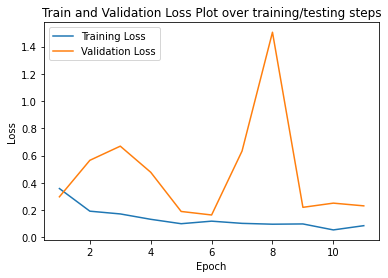

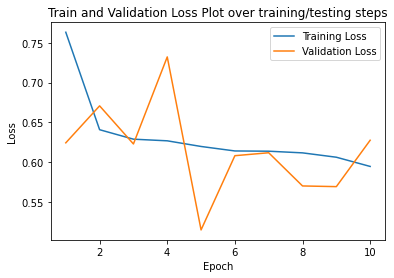

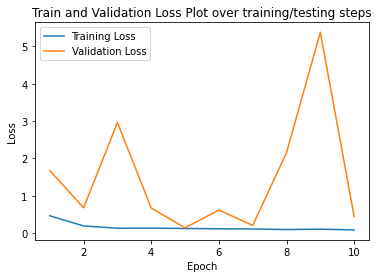

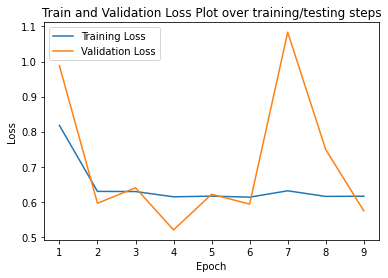

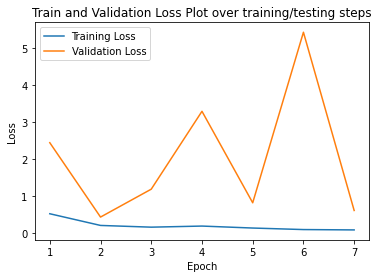

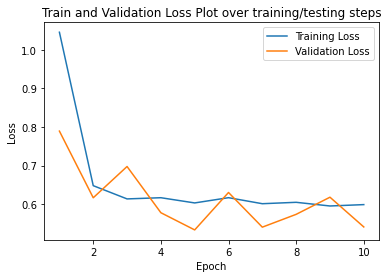

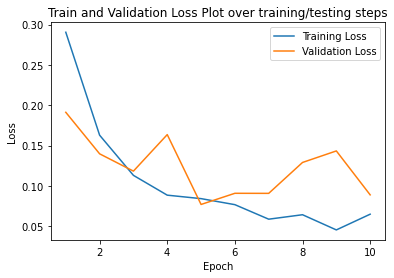

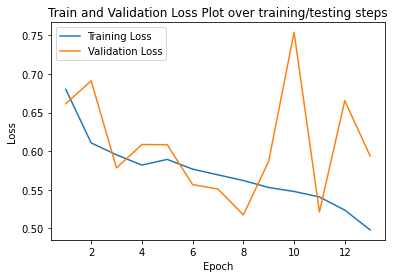

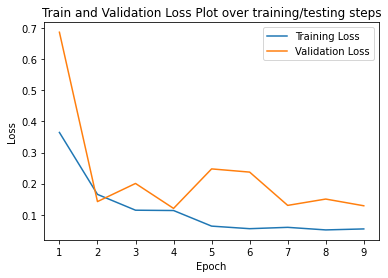

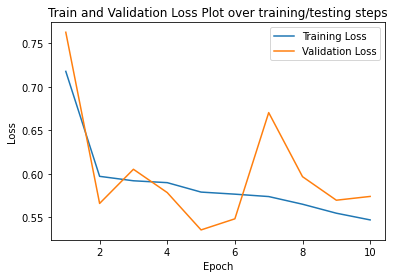

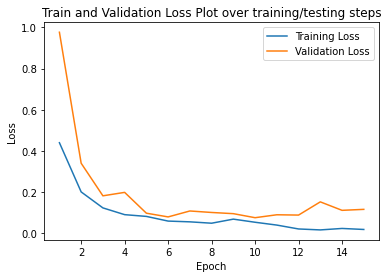

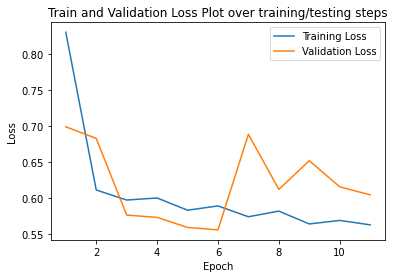

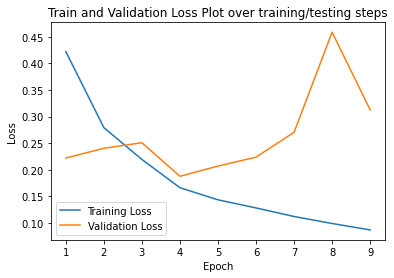

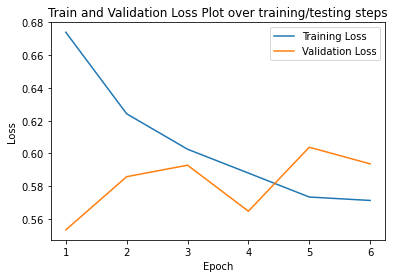

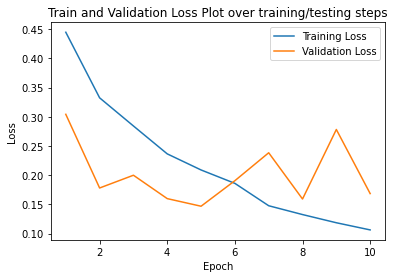

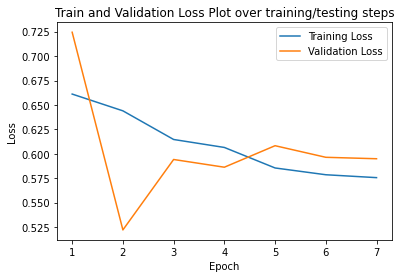

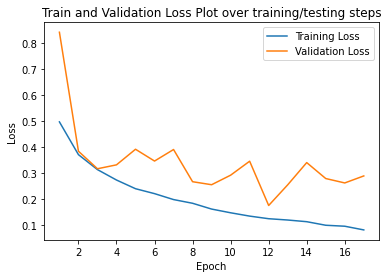

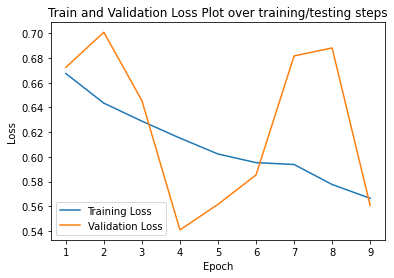

In [4]:
N_EPOCH = 200
L_RATE = [0.01, 0.001, 0.0001]
BATCH_SIZE = [16, 32, 64]
PATIENCE = 5
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []

for lr in L_RATE:
    for bs in BATCH_SIZE:
        print("LR: {}, BS: {}".format(lr, bs))
        fl_train_loader = DataLoader(fl_train, batch_size=bs, shuffle=True)
        fl_val_loader = DataLoader(fl_val, batch_size=bs, shuffle=True)

        fl_model = model.CNN().to(device)
        fl_optimizer = optim.Adam(fl_model.parameters(), lr=lr)

        model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")
        fl_loss = model.validate(fl_model, device, nn.BCELoss(), fl_val_loader)

        fl_model.to("cpu")

        sl_train_loader = DataLoader(sl_train, batch_size=bs, shuffle=True)
        sl_val_loader = DataLoader(sl_val, batch_size=bs, shuffle=True)

        sl_model = model.CNN().to(device)
        sl_optimizer = optim.Adam(sl_model.parameters(), lr=lr)
        
        model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
        sl_loss = model.validate(sl_model, device, nn.BCELoss(), sl_val_loader)

        sl_model.to("cpu")
        
        avg_loss = (fl_loss + sl_loss) / 2       
        print("LR: {}, BS: {}, LOSS: {}".format(lr, bs, avg_loss))        
        results.append(((lr, bs), avg_loss))

print(results)
best_lr = None
best_bs = None
best_loss = float("inf")
for result in results:
    if result[1] < best_loss:
        best_lr = result[0][0]
        best_bs = result[0][1]
        best_loss = result[1]
print("Best LR: {}, Best BS: {}".format(best_lr, best_bs))

# Linear Search for Dropout Probability

P: 0.05


Epoch 1



Validation loss: 0.14411884100373948
Validation set accuracy:  93.66602687140116 %


Epoch 2



Validation loss: 0.29854766211726447
Validation set accuracy:  84.26103646833013 %


Epoch 3



Validation loss: 0.09763226448558271
Validation set accuracy:  96.16122840690979 %


Epoch 4



Validation loss: 0.2940247899316477
Validation set accuracy:  92.51439539347409 %


Epoch 5



Validation loss: 0.11310389381127828
Validation set accuracy:  96.16122840690979 %


Epoch 6



Validation loss: 0.12262050825820277
Validation set accuracy:  96.3531669865643 %


Epoch 7



Validation loss: 0.14619996349299044
Validation set accuracy:  94.24184261036469 %


Epoch 8



Validation loss: 0.10370008082651166
Validation set accuracy:  96.73704414587333 %
Validation loss: 0.0983315511239749
Validation set accuracy:  96.16122840690979 %


Epoch 1



Validation loss: 0.6542813789844513
Validation set accuracy:  63.82428940568475 %


Epoch 2



Validation loss: 0.570282614827156
Validation set accuracy:  72.60981912144703 %


Epoch 3



Validation loss: 0.5580854523181915
Validation set accuracy:  76.22739018087856 %


Epoch 4



Validation loss: 0.5058572924137116
Validation set accuracy:  79.328165374677 %


Epoch 5



Validation loss: 0.511710113286972
Validation set accuracy:  77.2609819121447 %


Epoch 6



Validation loss: 0.6567471706867218
Validation set accuracy:  66.9250645994832 %


Epoch 7



Validation loss: 0.531597352027893
Validation set accuracy:  80.87855297157623 %


Epoch 8



Validation loss: 0.5753164803981781
Validation set accuracy:  73.64341085271317 %


Epoch 9



Validation loss: 0.6400781404972077
Validation set accuracy:  67.70025839793281 %
Validation loss: 0.517650637626648
Validation set accuracy:  79.328165374677 %
P: 0.05, LOSS: 0.30799109437531147
P: 0.1


Epoch 1



Validation loss: 0.17332038226904292
Validation set accuracy:  92.13051823416507 %


Epoch 2



Validation loss: 0.21709030352984415
Validation set accuracy:  91.17082533589252 %


Epoch 3



Validation loss: 0.09262234497476708
Validation set accuracy:  96.16122840690979 %


Epoch 4



Validation loss: 0.35171929295315885
Validation set accuracy:  85.22072936660268 %


Epoch 5



Validation loss: 0.10006560531981064
Validation set accuracy:  96.3531669865643 %


Epoch 6



Validation loss: 0.13843117094339422
Validation set accuracy:  95.39347408829174 %


Epoch 7



Validation loss: 0.14224424811475206
Validation set accuracy:  94.43378119001919 %


Epoch 8



Validation loss: 0.18417453588776742
Validation set accuracy:  93.85796545105566 %
Validation loss: 0.09201147171640486
Validation set accuracy:  96.16122840690979 %


Epoch 1



Validation loss: 0.6093453001976014
Validation set accuracy:  67.70025839793281 %


Epoch 2



Validation loss: 0.6840764904022216
Validation set accuracy:  61.75710594315245 %


Epoch 3



Validation loss: 0.5918522417545319
Validation set accuracy:  67.70025839793281 %


Epoch 4



Validation loss: 0.5551875674724579
Validation set accuracy:  75.45219638242894 %


Epoch 5



Validation loss: 0.6078656280040741
Validation set accuracy:  72.09302325581395 %


Epoch 6



Validation loss: 0.5412768852710724
Validation set accuracy:  76.4857881136951 %


Epoch 7



Validation loss: 0.7125483632087708
Validation set accuracy:  44.44444444444444 %


Epoch 8



Validation loss: 0.5203087460994721
Validation set accuracy:  75.71059431524547 %


Epoch 9



Validation loss: 0.5929389798641205
Validation set accuracy:  67.95865633074935 %


Epoch 10



Validation loss: 0.6298484277725219
Validation set accuracy:  71.31782945736434 %


Epoch 11



Validation loss: 0.6356052339076996
Validation set accuracy:  65.11627906976744 %


Epoch 12



Validation loss: 0.593374434709549
Validation set accuracy:  73.64341085271317 %


Epoch 13



Validation loss: 0.8149845218658447
Validation set accuracy:  49.09560723514212 %
Validation loss: 0.5230475389957427
Validation set accuracy:  75.71059431524547 %
P: 0.1, LOSS: 0.3075295053560738
P: 0.15


Epoch 1



Validation loss: 0.23545372102296713
Validation set accuracy:  90.978886756238 %


Epoch 2



Validation loss: 0.3175034446811134
Validation set accuracy:  89.82725527831094 %


Epoch 3



Validation loss: 0.17894617964824042
Validation set accuracy:  93.09021113243762 %


Epoch 4



Validation loss: 0.14943779914668112
Validation set accuracy:  93.47408829174664 %


Epoch 5



Validation loss: 0.25489253731388034
Validation set accuracy:  91.17082533589252 %


Epoch 6



Validation loss: 0.09336695227433335
Validation set accuracy:  96.73704414587333 %


Epoch 7



Validation loss: 0.12865581957510475
Validation set accuracy:  95.20153550863724 %


Epoch 8



Validation loss: 0.12685694082668333
Validation set accuracy:  96.92898272552783 %


Epoch 9



Validation loss: 0.07648781545911774
Validation set accuracy:  97.50479846449136 %


Epoch 10



Validation loss: 0.09950087520039895
Validation set accuracy:  96.92898272552783 %


Epoch 11



Validation loss: 0.12106031849962716
Validation set accuracy:  96.73704414587333 %


Epoch 12



Validation loss: 0.09208950651240726
Validation set accuracy:  97.31285988483685 %


Epoch 13



Validation loss: 0.08406154671331134
Validation set accuracy:  97.12092130518234 %


Epoch 14



Validation loss: 0.07680020708761676
Validation set accuracy:  96.92898272552783 %
Validation loss: 0.07654765355541851
Validation set accuracy:  97.50479846449136 %


Epoch 1



Validation loss: 0.591471289396286
Validation set accuracy:  65.63307493540051 %


Epoch 2



Validation loss: 0.6091818261146545
Validation set accuracy:  67.44186046511628 %


Epoch 3



Validation loss: 0.5771040010452271
Validation set accuracy:  66.40826873385014 %


Epoch 4



Validation loss: 0.5456541037559509
Validation set accuracy:  73.64341085271317 %


Epoch 5



Validation loss: 0.5542317593097686
Validation set accuracy:  74.93540051679587 %


Epoch 6



Validation loss: 0.5676025831699372
Validation set accuracy:  69.76744186046511 %


Epoch 7



Validation loss: 0.565823711156845
Validation set accuracy:  71.0594315245478 %


Epoch 8



Validation loss: 0.5667772674560547
Validation set accuracy:  74.16020671834626 %


Epoch 9



Validation loss: 0.6629635500907898
Validation set accuracy:  66.66666666666667 %
Validation loss: 0.574467099905014
Validation set accuracy:  73.64341085271317 %
P: 0.15, LOSS: 0.32550737673021624
[(0.05, 0.30799109437531147), (0.1, 0.3075295053560738), (0.15, 0.32550737673021624)]
Best P: 0.1


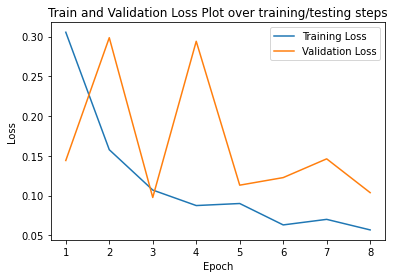

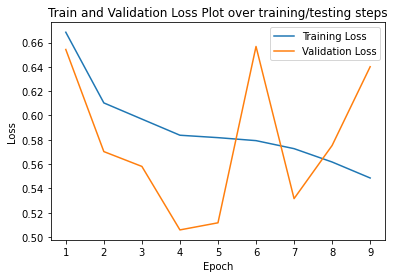

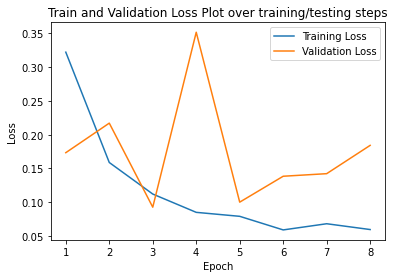

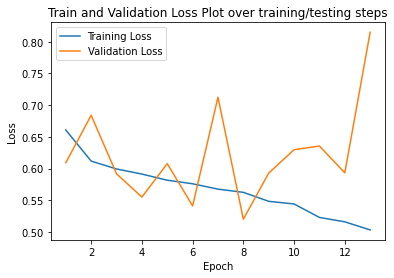

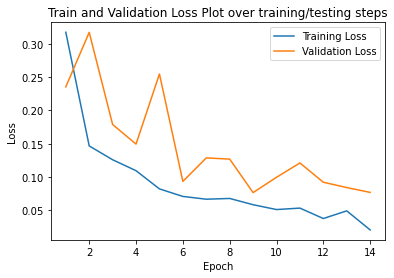

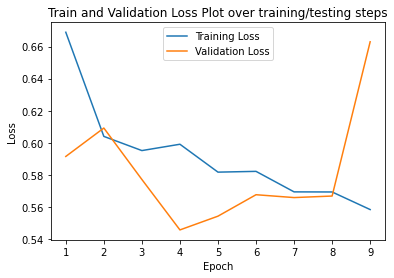

In [5]:
N_EPOCH = 200
L_RATE = best_lr
BATCH_SIZE = best_bs
PATIENCE = 5
DROPOUT = [0.05, 0.1, 0.15]
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []

for p in DROPOUT:
    print("P: {}".format(p))
    fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE, shuffle=True)
    fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE, shuffle=True)

    fl_model = model.CNN(dropout=p).to(device)
    fl_optimizer = optim.Adam(fl_model.parameters(), lr=L_RATE)

    model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")
    fl_loss = model.validate(fl_model, device, nn.BCELoss(), fl_val_loader)

    fl_model.to("cpu")

    sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE, shuffle=True)
    sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE, shuffle=True)

    sl_model = model.CNN(dropout=p).to(device)
    sl_optimizer = optim.Adam(sl_model.parameters(), lr=L_RATE)

    model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    sl_loss = model.validate(sl_model, device, nn.BCELoss(), sl_val_loader)

    sl_model.to("cpu")

    avg_loss = (fl_loss + sl_loss) / 2       
    print("P: {}, LOSS: {}".format(p, avg_loss))        
    results.append((p, avg_loss))
    
print(results)
best_p = None
best_loss = float('inf')
for result in results:
    if result[1] < best_loss:
        best_loss = result[1]
        best_p = result[0]
print("Best P: {}".format(best_p))

# Adam vs AdamW

Optim: <class 'torch.optim.adam.Adam'>


Epoch 1



Validation loss: 0.18800727198972847
Validation set accuracy:  92.13051823416507 %


Epoch 2



Validation loss: 0.14966236314538753
Validation set accuracy:  94.62571976967371 %


Epoch 3



Validation loss: 0.1313171083051147
Validation set accuracy:  95.96928982725528 %


Epoch 4



Validation loss: 0.12942662327127022
Validation set accuracy:  94.62571976967371 %


Epoch 5



Validation loss: 0.1301393835438472
Validation set accuracy:  95.58541266794626 %


Epoch 6



Validation loss: 0.11916457587909518
Validation set accuracy:  96.16122840690979 %


Epoch 7



Validation loss: 0.08963604048988076
Validation set accuracy:  96.92898272552783 %


Epoch 8



Validation loss: 0.21177724709339213
Validation set accuracy:  93.85796545105566 %


Epoch 9



Validation loss: 0.09662701087389988
Validation set accuracy:  96.73704414587333 %


Epoch 10



Validation loss: 0.0634672625909099
Validation set accuracy:  97.12092130518234 %


Epoch 11



Validation loss: 0.14368520650852146
Validation set accuracy:  95.77735124760076 %


Epoch 12



Validation loss: 0.15042387157022444
Validation set accuracy:  95.77735124760076 %


Epoch 13



Validation loss: 0.09802369859817466
Validation set accuracy:  97.12092130518234 %


Epoch 14



Validation loss: 0.12764981673204934
Validation set accuracy:  96.16122840690979 %


Epoch 15



Validation loss: 0.10064576792347273
Validation set accuracy:  97.12092130518234 %
Validation loss: 0.06351759202891227
Validation set accuracy:  97.12092130518234 %


Epoch 1



Validation loss: 0.5936581647396088
Validation set accuracy:  68.47545219638243 %


Epoch 2



Validation loss: 0.5681777155399322
Validation set accuracy:  69.76744186046511 %


Epoch 3



Validation loss: 0.5334443676471711
Validation set accuracy:  74.67700258397933 %


Epoch 4



Validation loss: 0.5937344479560852
Validation set accuracy:  69.50904392764858 %


Epoch 5



Validation loss: 0.5768707656860351
Validation set accuracy:  73.38501291989664 %


Epoch 6



Validation loss: 0.5721005868911743
Validation set accuracy:  68.21705426356588 %


Epoch 7



Validation loss: 0.6327873885631561
Validation set accuracy:  65.63307493540051 %


Epoch 8



Validation loss: 0.5577002453804016
Validation set accuracy:  75.1937984496124 %
Validation loss: 0.5450233089923858
Validation set accuracy:  74.67700258397933 %
Optim: <class 'torch.optim.adam.Adam'>, LOSS: 0.30427045051064905
Optim: <class 'torch.optim.adamw.AdamW'>


Epoch 1



Validation loss: 0.18460282728527533
Validation set accuracy:  91.93857965451056 %


Epoch 2



Validation loss: 0.2927585332231088
Validation set accuracy:  87.71593090211132 %


Epoch 3



Validation loss: 0.12708132341504097
Validation set accuracy:  96.16122840690979 %


Epoch 4



Validation loss: 0.10075452184361039
Validation set accuracy:  95.77735124760076 %


Epoch 5



Validation loss: 0.13203517210698038
Validation set accuracy:  94.62571976967371 %


Epoch 6



Validation loss: 0.14557020896763512
Validation set accuracy:  93.66602687140116 %


Epoch 7



Validation loss: 0.16885121777357365
Validation set accuracy:  94.62571976967371 %


Epoch 8



Validation loss: 0.08823886207502449
Validation set accuracy:  97.88867562380038 %


Epoch 9



Validation loss: 0.10059555453445876
Validation set accuracy:  97.31285988483685 %


Epoch 10



Validation loss: 0.10796717474427582
Validation set accuracy:  97.88867562380038 %


Epoch 11



Validation loss: 0.15823321071785
Validation set accuracy:  95.58541266794626 %


Epoch 12



Validation loss: 0.09793700771335738
Validation set accuracy:  97.31285988483685 %


Epoch 13



Validation loss: 0.08834196107989445
Validation set accuracy:  97.88867562380038 %
Validation loss: 0.08709396686842383
Validation set accuracy:  97.88867562380038 %


Epoch 1



Validation loss: 0.5555651330947876
Validation set accuracy:  71.57622739018088 %


Epoch 2



Validation loss: 0.599662379026413
Validation set accuracy:  74.4186046511628 %


Epoch 3



Validation loss: 0.552726281285286
Validation set accuracy:  72.86821705426357 %


Epoch 4



Validation loss: 0.5718174278736115
Validation set accuracy:  72.86821705426357 %


Epoch 5



Validation loss: 0.5251785409450531
Validation set accuracy:  80.10335917312662 %


Epoch 6



Validation loss: 0.504347196817398
Validation set accuracy:  79.84496124031008 %


Epoch 7



Validation loss: 0.5341255605220795
Validation set accuracy:  77.77777777777777 %


Epoch 8



Validation loss: 0.5669171702861786
Validation set accuracy:  75.45219638242894 %


Epoch 9



Validation loss: 0.5746286725997924
Validation set accuracy:  69.25064599483204 %


Epoch 10



Validation loss: 0.6031461846828461
Validation set accuracy:  72.86821705426357 %


Epoch 11



Validation loss: 0.6379397368431091
Validation set accuracy:  70.02583979328165 %
Validation loss: 0.5096111381053925
Validation set accuracy:  79.84496124031008 %
Optim: <class 'torch.optim.adamw.AdamW'>, LOSS: 0.2983525524869082
[(<class 'torch.optim.adam.Adam'>, 0.30427045051064905), (<class 'torch.optim.adamw.AdamW'>, 0.2983525524869082)]
Best O: <class 'torch.optim.adamw.AdamW'>


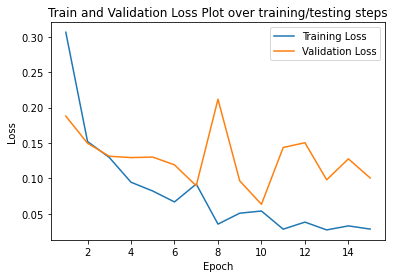

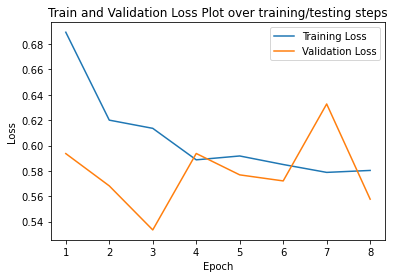

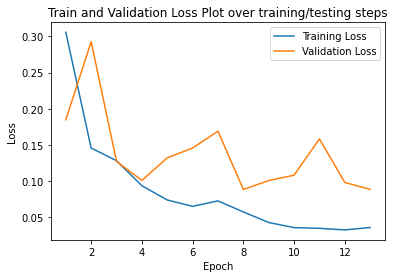

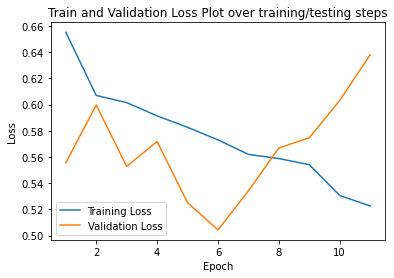

In [6]:
N_EPOCH = 200
L_RATE = best_lr
BATCH_SIZE = best_bs
PATIENCE = 5
DROPOUT = best_p
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
results = []

for o in [optim.Adam, optim.AdamW]:
    print("Optim: {}".format(o))
    fl_train_loader = DataLoader(fl_train, batch_size=BATCH_SIZE, shuffle=True)
    fl_val_loader = DataLoader(fl_val, batch_size=BATCH_SIZE, shuffle=True)

    fl_model = model.CNN(dropout=DROPOUT).to(device)
    fl_optimizer = o(fl_model.parameters(), lr=L_RATE)

    model.train(fl_model, device, nn.BCELoss(), fl_optimizer, fl_train_loader, fl_val_loader, N_EPOCH, PATIENCE, "fl")
    fl_loss = model.validate(fl_model, device, nn.BCELoss(), fl_val_loader)

    fl_model.to("cpu")

    sl_train_loader = DataLoader(sl_train, batch_size=BATCH_SIZE, shuffle=True)
    sl_val_loader = DataLoader(sl_val, batch_size=BATCH_SIZE, shuffle=True)

    sl_model = model.CNN(dropout=DROPOUT).to(device)
    sl_optimizer = o(sl_model.parameters(), lr=L_RATE)

    model.train(sl_model, device, nn.BCELoss(), sl_optimizer, sl_train_loader, sl_val_loader, N_EPOCH, PATIENCE, "sl")
    sl_loss = model.validate(sl_model, device, nn.BCELoss(), sl_val_loader)

    sl_model.to("cpu")

    avg_loss = (fl_loss + sl_loss) / 2       
    print("Optim: {}, LOSS: {}".format(o, avg_loss))        
    results.append((o, avg_loss))
    
print(results)
best_o = None
best_loss = float('inf')
for result in results:
    if result[1] < best_loss:
        best_loss = result[1]
        best_o = result[0]
print("Best O: {}".format(best_o))

In [7]:
print("Best LR: {}, BS: {}, P: {}, O: {}".format(best_lr, best_bs, best_p, best_o))

Best LR: 0.001, BS: 16, P: 0.1, O: <class 'torch.optim.adamw.AdamW'>
